Função Utilizada para gerar um data Set com duas dimensões de acordo com o tamanho informado.
Em Y já faço classificação do mesmo de acordo com os valores.

"Considere um dataset de 2 dimensões em que todos os pontos com x1 > x2 pertencem à classe positiva, e todos os pontos com x1 <= x2 pertencem à classe negativa. Assim, o separador entre as duas classes é um hiperplano linear definido por x1 - x2 = 0. Agora crie um dataset com 20 pontos aleatoriamente gerados dentro de uma unidade quadrada no quadrante positivo. Rotule cada ponto dependendo se x1 é maior do que x2, ou não."



In [ ]:
import numpy as np

def geradataset(tamanho):
  X = np.random.uniform(size=(tamanho,2))
  y = np.array(X[:,0]>X[:,1],dtype=int)*2-1
  return X,y

In [ ]:
X,y = geradataset(20)

In [ ]:
X,y

(array([[0.79028208, 0.8583451 ],
        [0.7295374 , 0.40675068],
        [0.94764598, 0.32913253],
        [0.33331978, 0.91211634],
        [0.12946913, 0.8699384 ],
        [0.84756879, 0.43032054],
        [0.24351861, 0.41826227],
        [0.65345142, 0.44059949],
        [0.33191774, 0.18971456],
        [0.77167863, 0.42670488],
        [0.28524399, 0.49566886],
        [0.56853884, 0.23918443],
        [0.50675361, 0.41506772],
        [0.75995456, 0.49499019],
        [0.84828604, 0.29264799],
        [0.89845408, 0.20972141],
        [0.67971201, 0.02256752],
        [0.00384225, 0.46178635],
        [0.78574727, 0.82117249],
        [0.31169882, 0.75500799]]),
 array([-1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        -1, -1, -1]))

In [ ]:
import matplotlib.pyplot as plt

def plotadataset(X,y):
  for k in set(y):
    plt.plot(X[:,0][y==k],X[:,1][y==k],"o", alpha=0.3)
def plotavetor(vetor, cor="k"):
  origem = [0,0]
  plt.arrow(*origem,*vetor,color=cor)
def perpendicular(vetor):
  perp = np.array(vetor[::-1])
  perp[0]*=-1
  return perp

Ploto o Dataset de Acordo com a classificação.

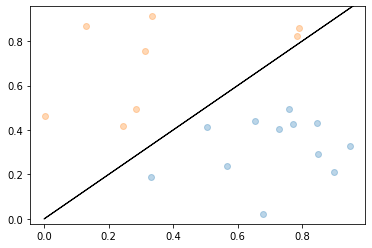

In [ ]:
plotadataset(X,y)
vetor = [1,-1]
hiperplano = perpendicular(vetor)
plotavetor(hiperplano)

Funções principais da Tarefa Proposta

Implementação do perceptron:

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class CustoPerceptron():
  @staticmethod
  def erro(y,ypred):
    return y-ypred
  @staticmethod
  def custo(y,ypred):
    return np.sum(CustoPerceptron.erro(y,ypred)**2)
  @staticmethod
  def gradiente(y,ypred, X):
    return np.matmul(CustoPerceptron.erro(y,ypred), X)

class HingeLoss():
  @staticmethod
  def erro(y,ypred):
    return np.multiply(y,ypred)
  @staticmethod
  def custo(y,ypred):
    return np.sum(1+ HingeLoss.erro(y,ypred))
  @staticmethod
  def gradiente(y,ypred, X):
    marginais = HingeLoss.erro(y,ypred)< 1
    return np.matmul(y[marginais], X[marginais])

class Perceptron(BaseEstimator,ClassifierMixin):
  def __init__(self,custo=CustoPerceptron()):
    self.w=None
    self.activation = lambda a:(a>=0)*2-1
    self.alpha = 0.1
    self.maxiter = 100
    self.custo = custo
  def fit(self, X, y):
    self.w=np.random.uniform(-1,1,size=2)
    for _ in range(self.maxiter):
      ypred = self.predict(X)
      custo = self.custo.custo(y,ypred)
      self.w = self.w + self.alpha*self.custo.gradiente(y,ypred,X)
      if(custo==0):
        break

  def predict(self, X):
    a = np.matmul(X,self.w)
    ypred = self.activation(a)
    return ypred
  


Faço a Primeira Instância do Perceptron e o treinamento com os 20 dados iniciais gerados.

In [ ]:
perceptron = Perceptron()
perceptron.fit(X,y)
ypred = perceptron.predict(X)
sum(y==ypred)/len(y)

1.0

Ploto uma predição em cima dos valores iniciais treinados

[ 1.21216377 -1.31307235]


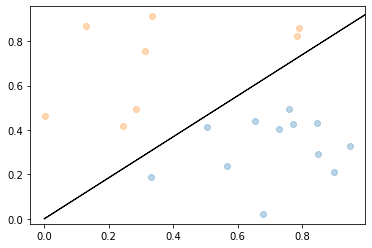

In [ ]:
plotadataset(X,y)
print(perceptron.w)
plotavetor(perpendicular(perceptron.w))

Gero um dataset com 1000 dados
em cima disso faço a predição

0.956
[ 1.21216377 -1.31307235]


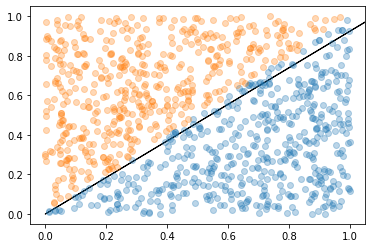

In [ ]:
Xte, yte = geradataset(1000)
ypred = perceptron.predict(Xte)
print(sum(yte == ypred)/len(yte))

plotadataset(Xte,yte)
print(perceptron.w)
plotavetor(perpendicular(perceptron.w))

Realizo todo procedimento novamente, porém Utilizando o Hingeloss

In [ ]:
perceptron = Perceptron(custo=HingeLoss())
perceptron.fit(X,y)
ypred = perceptron.predict(X)
sum(y==ypred)/len(y)

1.0

[ 0.4656524 -0.5493832]


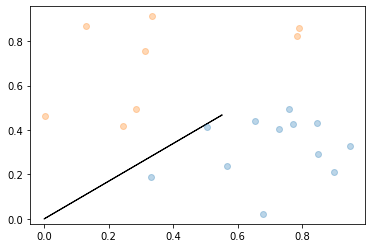

In [ ]:
plotadataset(X,y)
print(perceptron.w)
plotavetor(perpendicular(perceptron.w))

0.912
[ 0.4656524 -0.5493832]


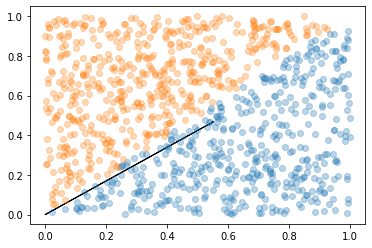

In [ ]:
Xte, yte = geradataset(1000)
ypred = perceptron.predict(Xte)
print(sum(yte == ypred)/len(yte))

plotadataset(Xte,yte)
print(perceptron.w)
plotavetor(perpendicular(perceptron.w))

Comparação Direta Entre os dois:
Nova base de 20 dados para treino
Nova base de 1000 dados para teste

0.953
[ 1.11713249 -1.24085183]


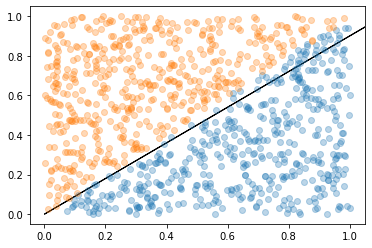

0.988
[ 0.67007539 -0.65767128]


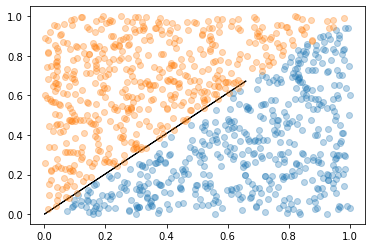

In [ ]:
perceptron = Perceptron()
X,y = geradataset(20)
perceptron.fit(X,y)

Xte, yte = geradataset(1000)
ypred = perceptron.predict(Xte)
print(sum(yte == ypred)/len(yte))

plotadataset(Xte,yte)
print(perceptron.w)
plotavetor(perpendicular(perceptron.w))

plt.show()

perceptron = Perceptron(custo=HingeLoss())
perceptron.fit(X,y)

ypred = perceptron.predict(Xte)
print(sum(yte == ypred)/len(yte))

plotadataset(Xte,yte)
print(perceptron.w)
plotavetor(perpendicular(perceptron.w))


Proposta da atividade:

1 - Implemente o algoritmo perceptron sem regularização. Treino-o com os 20 pontos gerados, e teste sua acurácia com 1000 pontos gerados aleatoriamente dentro da unidade quadrada. Gere os pontos de teste usando o mesmo procedimento usado para gerar os dados de treino.

O Algoritmo foi implementado conforme as aulas da disciplina..
Acurácia com 1000 pontos: 0.956

2 - Mude o critério do perceptron para hinge-loss na sua implementação. Repita o treino e a estimativa de acurácia com os mesmo pontos do item anterior.

- O Algoritmo foi implementado conforme as aulas da disciplina. Caso deseje utilizar o Hinge-loss, basta passar como parâmetro "custo=Hingeloss()" no construtor de objetos da classe Perceptron

Acurácia com 1000 pontos: 0.912

  3 - Em qual caso você obteve a melhor acurácia, e por quê?

Na primeira rodada realizada o HingeLoss perdeu em desempenho (0.956 vs 0.912)
Porém durante o desenvolvimento e em vários testes que realizei ele chegou a ganhar... como pode ser visto no segundo teste que fiz (0.953 vs 0.988).

No caso vou utilizar como referência para essa resposta o primeiro teste.
Acredito que pelo data set de treino ser bem reduzido (20 registros) ele se torna bem sensível a qualidade dos dados gerados. Como é muito reduzido de acordo com o que for gerado para treinar irá beneficiar um ou outro algoritmo.

4 - Em qual caso você acha que a classificação dos mesmos 1000 pontos de teste não será significativamente diferente se o algoritmo for treinado com 20 pontos diferentes, também gerados aleatoriamente?

Conforme os testes podem ser visto abaixo... o HingeLoss obteve melhores desempenho e com valores próximos de resultado.

0.999
[ 0.57894483 -0.58033171]


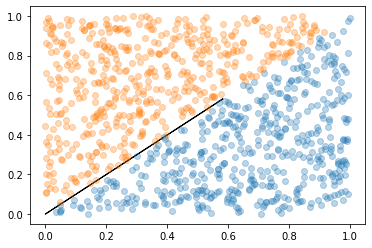

0.999
[ 0.36130336 -0.35951499]


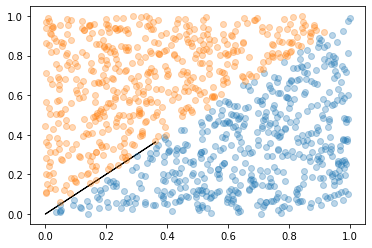

In [ ]:
perceptron = Perceptron()
X,y = geradataset(20)
perceptron.fit(X,y)

Xte, yte = geradataset(1000)
ypred = perceptron.predict(Xte)
print(sum(yte == ypred)/len(yte))

plotadataset(Xte,yte)
print(perceptron.w)
plotavetor(perpendicular(perceptron.w))

plt.show()

perceptron = Perceptron(custo=HingeLoss())
perceptron.fit(X,y)

ypred = perceptron.predict(Xte)
print(sum(yte == ypred)/len(yte))

plotadataset(Xte,yte)
print(perceptron.w)
plotavetor(perpendicular(perceptron.w))

0.953
[ 0.91097561 -0.84027863]


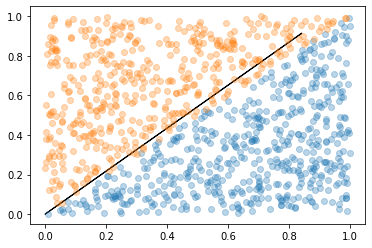

0.993
[ 0.61212425 -0.62125751]


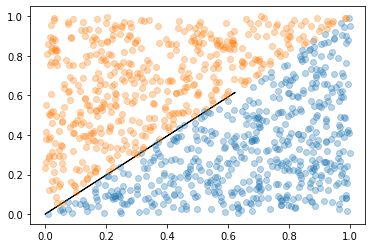

In [ ]:
perceptron = Perceptron()
X,y = geradataset(20)
perceptron.fit(X,y)

Xte, yte = geradataset(1000)
ypred = perceptron.predict(Xte)
print(sum(yte == ypred)/len(yte))

plotadataset(Xte,yte)
print(perceptron.w)
plotavetor(perpendicular(perceptron.w))

plt.show()

perceptron = Perceptron(custo=HingeLoss())
perceptron.fit(X,y)

ypred = perceptron.predict(Xte)
print(sum(yte == ypred)/len(yte))

plotadataset(Xte,yte)
print(perceptron.w)
plotavetor(perpendicular(perceptron.w))

0.995
[ 1.0913531  -1.07457121]


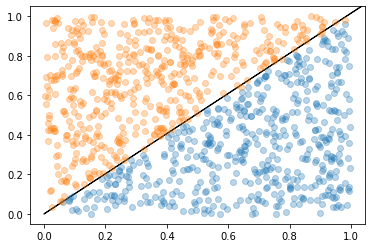

0.997
[ 0.73176728 -0.72611806]


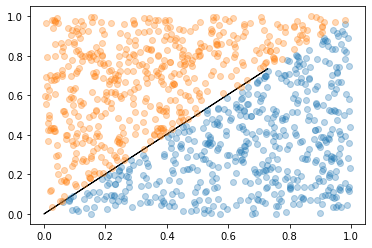

In [ ]:
perceptron = Perceptron()
X,y = geradataset(20)
perceptron.fit(X,y)

Xte, yte = geradataset(1000)
ypred = perceptron.predict(Xte)
print(sum(yte == ypred)/len(yte))

plotadataset(Xte,yte)
print(perceptron.w)
plotavetor(perpendicular(perceptron.w))

plt.show()

perceptron = Perceptron(custo=HingeLoss())
perceptron.fit(X,y)

ypred = perceptron.predict(Xte)
print(sum(yte == ypred)/len(yte))

plotadataset(Xte,yte)
print(perceptron.w)
plotavetor(perpendicular(perceptron.w))

0.963
[ 2.12500418 -2.29162094]


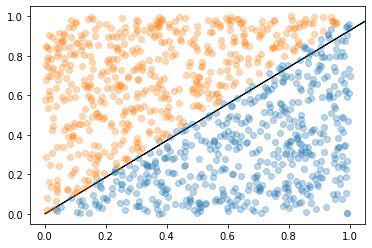

0.969
[ 1.05403337 -1.13139258]


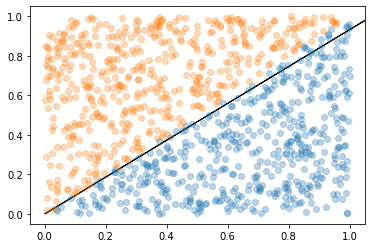

In [ ]:
perceptron = Perceptron()
X,y = geradataset(20)
perceptron.fit(X,y)

Xte, yte = geradataset(1000)
ypred = perceptron.predict(Xte)
print(sum(yte == ypred)/len(yte))

plotadataset(Xte,yte)
print(perceptron.w)
plotavetor(perpendicular(perceptron.w))

plt.show()

perceptron = Perceptron(custo=HingeLoss())
perceptron.fit(X,y)

ypred = perceptron.predict(Xte)
print(sum(yte == ypred)/len(yte))

plotadataset(Xte,yte)
print(perceptron.w)
plotavetor(perpendicular(perceptron.w))